In [ ]:
#importing necesarry library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#reading the file
url = "http://bit.ly/w-data"   #url for dataset of the given problem
df = pd.read_csv(url)    #reading csv file

In [ ]:
df.head()  #showing value of top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
print(df.shape) #know the no. of rows and columns present

(25, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isna().sum()   #is there any missing value

Hours     0
Scores    0
dtype: int64

In [ ]:
x = df.iloc[:,:-1].values    #independent variable

In [ ]:
y = df.iloc[:,1].values    #dependent variable

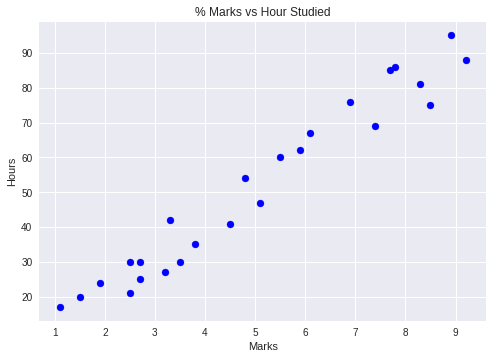

In [ ]:
#ploting the graph
plt.style.use("seaborn")
plt.scatter(x,y,color = "Blue")
plt.title("% Marks vs Hour Studied")
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()

In [ ]:
#Splitting the data in training and testing
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(x_train,y_train)  #fitting the model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#predicting the value
y_preds = lm.predict(x_test)
print(y_preds)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
# Plotting the regression line
coefficient = lm.coef_
intercept  = lm.intercept_

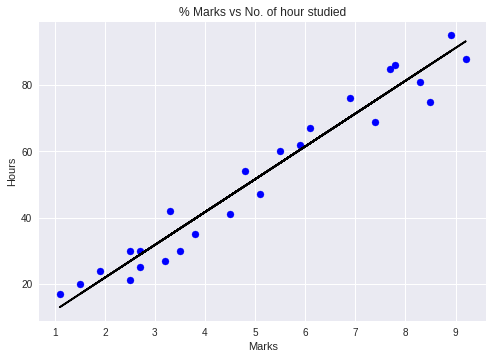

In [ ]:
# Formula of line is y = m*x + c
line = coefficient*x + intercept

plt.style.use("seaborn")
plt.plot(x,line,color = 'black')
plt.scatter(x,y,color = "blue")
plt.title("% Marks vs No. of hour studied")
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()

In [ ]:
result = pd.DataFrame({"Actual Data": y_test,
                     "Predicted Data": y_preds})
print(result)

   Actual Data  Predicted Data
0           20       16.884145
1           27       33.732261
2           69       75.357018
3           30       26.794801
4           62       60.491033


In [ ]:
input_pred = lm.predict([[9.25]])
print(f"Predicted score for 9.25 hour of study is : {round(input_pred[0],2)}")

Predicted score for 9.25 hour of study is : 93.69


In [ ]:
from sklearn import metrics  
error = metrics.mean_absolute_error(y_test, y_preds)
print(f'Mean Absolute Error: {error}')

In [7]:
#we can added more feature like "syllabus complete after studying that no of hour" to make our model more efficient

**Task 2- K Means Clustring**



TASK : Prediction of optimum number of cluster and visual representstion for Iris dataset.


Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

Sample Solution : https://drive.google.com/file/d/1Yjz8dzSbpAPwJdcVb20eFWniIDbs6ZH7/view?usp=sharing

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn import datasets
iris = datasets.load_iris()

In [27]:
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])

## Checking first five rows of dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


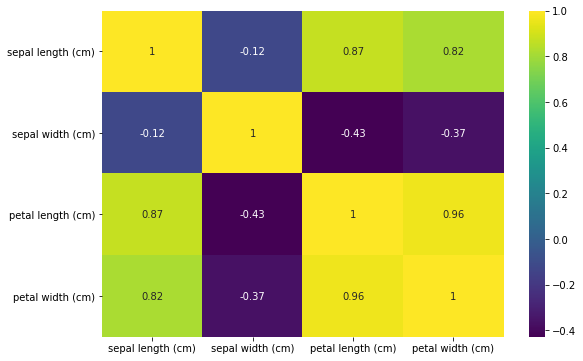

In [30]:

# plotting a heatmap to find corelation between features of a dataset

plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

In [32]:
from sklearn.cluster import KMeans   #for using kmeans to find optimum number of clusters

In [34]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

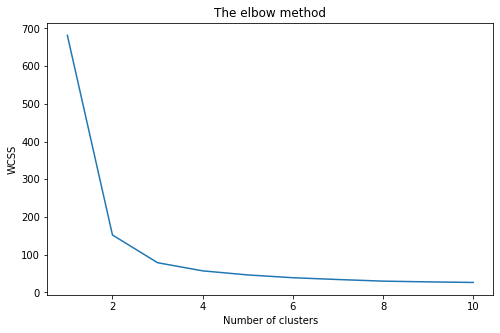

In [35]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
#Creating cluster
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data)

In [38]:
#Cluster centroids with labels

print(kmeans.cluster_centers_)
print('\n')
print(kmeans.labels_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


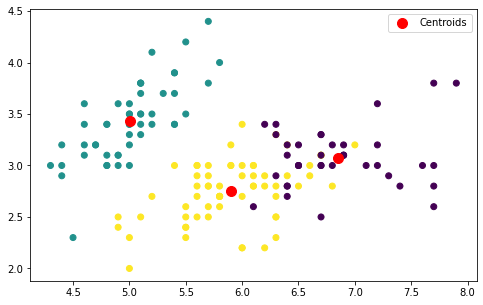

In [41]:
# visualizing the clusters based on first two columns of the dataset

plt.figure(figsize=(8,5))

plt.scatter(data['sepal length (cm)'], 
            data['sepal width (cm)'], 
            c=kmeans.labels_)

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

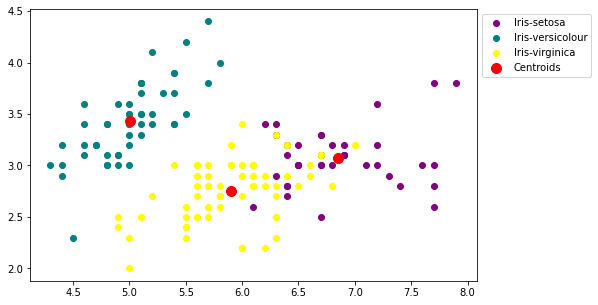

In [42]:
#visualizing clusters based on each target classes..

plt.figure(figsize=(8,5))

plt.scatter(data[y_kmeans == 0]['sepal length (cm)'], 
            data[y_kmeans == 0]['sepal width (cm)'], 
            c = 'purple', label = 'Iris-setosa')

plt.scatter(data[y_kmeans == 1]['sepal length (cm)'], 
            data[y_kmeans == 1]['sepal width (cm)'], 
            c = 'teal', label = 'Iris-versicolour')

plt.scatter(data[y_kmeans == 2]['sepal length (cm)'], 
            data[y_kmeans == 2]['sepal width (cm)'],
         c = 'yellow', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend(bbox_to_anchor=(1,1),loc=2)

 Task 3 : To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

Sample Solution : https://drive.google.com/file/d/1mQguC2gku2-QFruj09a30N0TYDwCmPkq/view?usp=sharing

In [1]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

iris = datasets.load_iris()


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [9]:

data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:

y = iris.target                              #OUTPUT VARIABLE
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(data_iris,y,random_state=0,test_size=0.2)

In [18]:
tree = DecisionTreeClassifier()
tree.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
pred=tree.predict(test_x)
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

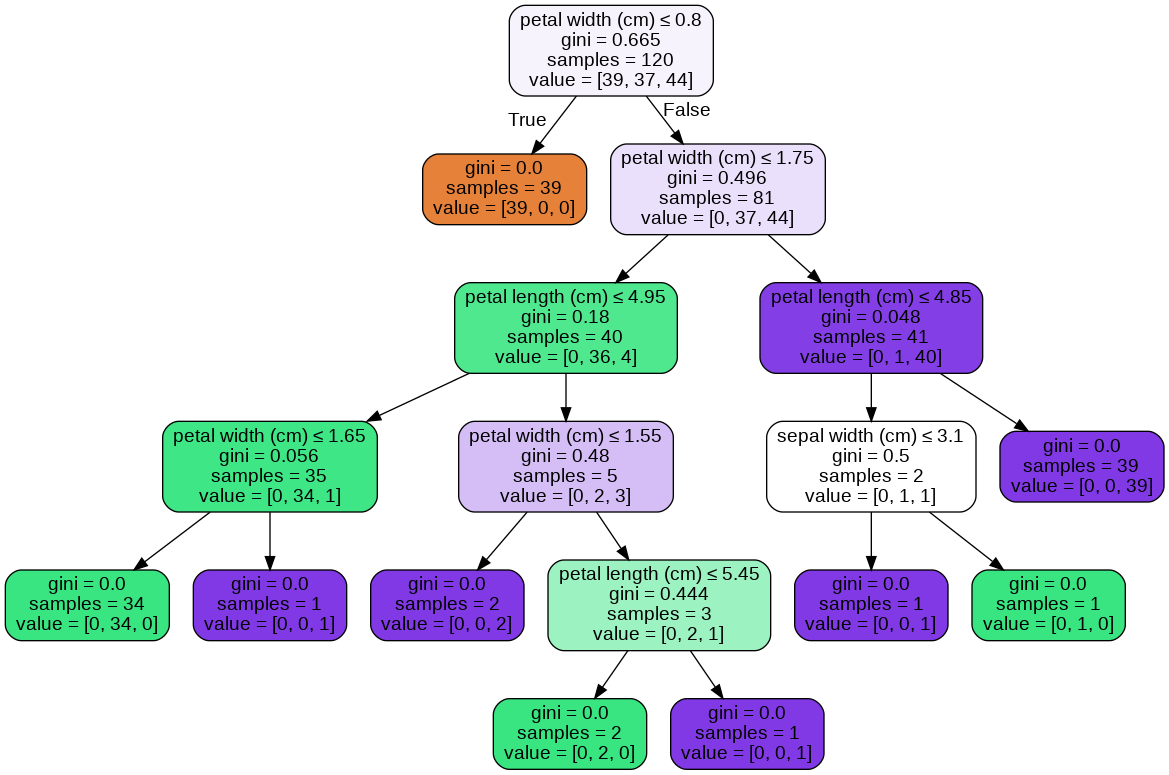

In [20]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())